In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
'''
Class defination of Multi Armed Bandit testbed
'''
class multi_armed_bandit:
    '''
    Constructor
    
    variables created:
        k - number of arms
        bandits - number of different problems we are creating
        stationary - boolean parameter to tell whether the true values are stationary or not
        qn - estimate of true values
        max_arms - greedy option for each problem
    '''
    def __init__(self, k, bandits, stationary):
        self.k = k
        self.bandits = bandits
        self.qn = np.zeros((self.bandits, self.k))
        if(stationary):
            self.true_rewards = np.random.normal(0,1,(bandits, k))
        else:
            self.true_rewards =  np.zeros((self.bandits, k))
        self.max_arms = np.argmax(self.true_rewards, 1)           
    
    '''
    Function to take random walks with mean 0 and variance 0.01
    '''
    def random_walks(self):
        self.true_rewards += np.random.normal(0,0.01,(self.bandits, self.k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    '''
    Function to performed sample average action value method with given alpha
    
    params:
        i - index for the problem
        j - action selected
        R - reward we got this time step
        alpha - step size
    '''
    def increment_method(self, i, j, R, alpha):
        self.qn[i][j] += alpha*(R - self.qn[i][j])

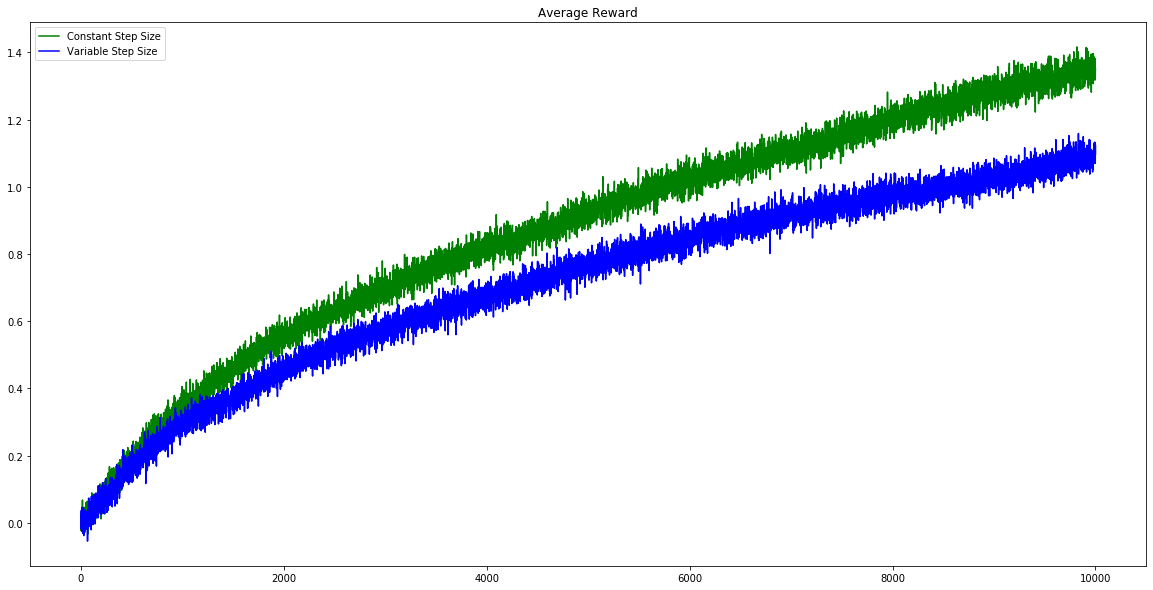

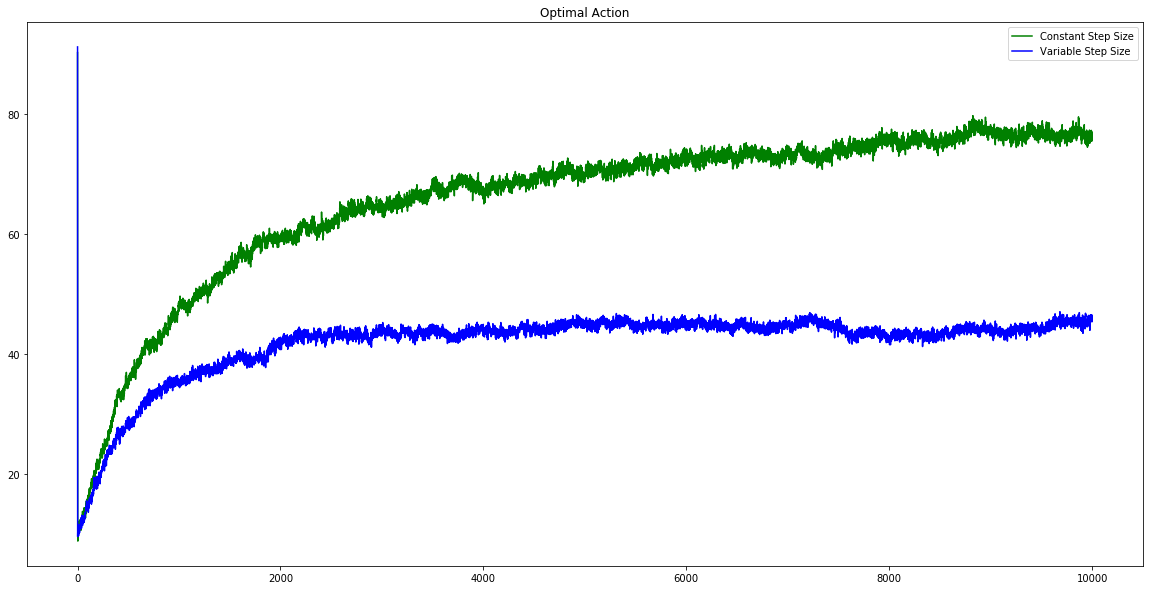

In [3]:
#non stationary version

fig1 = plt.figure(figsize = (20,10)).add_subplot(111)
fig2 = plt.figure(figsize = (20,10)).add_subplot(111)

color = ['g','b']

for method in range(2):
    
    #variables to store data for plotting
    rewards = []
    opt_pulls = []
    
    #variables for simulation
    testbed = multi_armed_bandit(10,2000,False)
    epsilon = 0.1
    n = np.zeros((testbed.bandits, testbed.k))
    all_rewards = [[] for i in range(testbed.bandits)]
    
    #label for the graph
    l = ''

    #starting simulation
    for i in range(10001):
        
        #temporary variables to store number of times optimal arm was selected and to store step rewards resp.
        opt_pull = 0
        temp_rewards = []
        
        for j in range(testbed.bandits):

            #selecting an action using e-greedy
            if(random.random() < epsilon):
                p = np.random.randint(testbed.k)
            else:
                p = np.argmax(testbed.qn[j])

            #counting number of optimal actions
            if(p == testbed.max_arms[j]):
                opt_pull+=1

            #pulling reward from gaussian distribution centered at true rewards
            curr_reward = np.random.normal(testbed.true_rewards[j][p], 1)
            temp_rewards.append(curr_reward)

            n[j][p]+=1
            
            #method = 0 is used for constant step size and method = 1 for sampled averages
            if(method == 0):
                alpha = 0.1
                testbed.increment_method(j, p, curr_reward, alpha)
            elif(method == 1):
                alpha = 1/n[j][p]
                testbed.increment_method(j, p, curr_reward, alpha)

        #using random walks to get non stationary true rewards
        testbed.random_walks()

        #calcualting average rewards and optimal action percentage
        avg_reward = np.mean(temp_rewards)
        rewards.append(avg_reward)
        opt_pulls.append(float(opt_pull)/20)
        
        if(method == 0):
            l = 'Constant Step Size'
        else:
            l = 'Variable Step Size'

    fig1.plot(range(10001), rewards, color[method], label = l)
    fig2.plot(range(10001), opt_pulls, color[method], label = l)
    
fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')

fig1.legend(loc='upper left')
fig2.legend(loc='upper right')